In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Exploratory Data Analysis for "The Machine Learning Process Course on 365 Data Science". 
We are analyzing real data from my YouTube channel. The focus of EDA is to understand patterns in the data so that we can start generating insights and predictions. In this notebook, I walk through the main EDA concepts from the machine learning process course. We cover:
- Single Variable Plots
 - Histograms 
 - Box Plots
 - Bar charts
- Relationships & Multi-variable plots 
 - Scatterplots
 - Correlation Matrices 
 - Pivot Tables 
 - Bar Charts 
 - Line Charts
 
 
 I will be using matplotlib and Seaborn to visualize this data. It should be noted that there are plenty of different visualization libraries to choose from. I personally use plotly quite a lot in my own personal projects. I find that these two that we are using have good basics that are easy to understand and build on. 

## Loading in the data
Our first step is to load in the data and get a feel for what we will be working with. We do the following steps before we start with the true EDA:
1) Load in our libraries that we plan to use for data manipulation and visualization 

2) Load in our data 

3) Explore the high level features of our data (size, columns, etc.)

4) Additional cleaning of our data if needed 

5) Explore high level descriptive statistics of our data

In [14]:
#import basic visualization libraries 
import matplotlib.pyplot as plt 
import seaborn as sns  
#clean columns 

In [6]:
#read in data 
df_agg = pd.read_csv('./data/Aggregated_Metrics_By_Video.csv',encoding='utf-8')
df_agg_country_sub = pd.read_csv('./data/Aggregated_Metrics_By_Country_And_Subscriber_Status.csv', encoding='utf-8')
df_ts = pd.read_csv('./data/Video_Performance_Over_Time.csv', encoding='utf-8')
df_comments = pd.read_csv('./data/All_Comments_Final.csv', encoding='utf-8')

In [7]:
#look at columns for each dataframe 
print(df_agg.columns)
print(df_agg_country_sub.columns)
print(df_ts.columns)
print(df_comments.columns)

Index(['Video', 'Video title', 'Video pub­lish time', 'Com­ments ad­ded',
       'Shares', 'Dis­likes', 'Likes', 'Sub­scribers lost',
       'Sub­scribers gained', 'RPM (USD)', 'CPM (USD)',
       'Av­er­age per­cent­age viewed (%)', 'Av­er­age view dur­a­tion',
       'Views', 'Watch time (hours)', 'Sub­scribers',
       'Your es­tim­ated rev­en­ue (USD)', 'Im­pres­sions',
       'Im­pres­sions click-through rate (%)'],
      dtype='object')
Index(['Video Title', 'External Video ID', 'Video Length', 'Thumbnail link',
       'Country Code', 'Is Subscribed', 'Views', 'Video Likes Added',
       'Video Dislikes Added', 'Video Likes Removed',
       'User Subscriptions Added', 'User Subscriptions Removed',
       'Average View Percentage', 'Average Watch Time', 'User Comments Added'],
      dtype='object')
Index(['Date', 'Video Title', 'External Video ID', 'Video Length',
       'Thumbnail link', 'Views', 'Video Likes Added', 'Video Dislikes Added',
       'Video Likes Removed', 'User Sub

In [8]:
#the column headers have some extra non-ascii characters, we need to clean them up before we do our analysis
#this goes through each column and removes all the non-ascii characters 
newcols =[x.encode("ascii", "ignore").decode('utf-8') for x in df_agg.columns]
df_agg.columns = newcols

In [9]:
df_agg.columns

Index(['Video', 'Video title', 'Video publish time', 'Comments added',
       'Shares', 'Dislikes', 'Likes', 'Subscribers lost', 'Subscribers gained',
       'RPM (USD)', 'CPM (USD)', 'Average percentage viewed (%)',
       'Average view duration', 'Views', 'Watch time (hours)', 'Subscribers',
       'Your estimated revenue (USD)', 'Impressions',
       'Impressions click-through rate (%)'],
      dtype='object')

In [10]:
#Using .describe() gives us basic descriptive statistics for all of our numeric data. From this we can see which variables we might want to explore more. 
#We can see things like: which variables might have outliers, which might have skew, or which have a wide range of values
df_agg.describe()

,Comments added,Shares,Dislikes,Likes,Subscribers lost,Subscribers gained,RPM (USD),CPM (USD),Average percentage viewed (%),Views,Watch time (hours),Subscribers,Your estimated revenue (USD),Impressions,Impressions click-through rate (%)
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,222.000000,224.000000,2.240000e+02,224.000000,224.000000,224.000000,2.240000e+02,224.000000
mean,126.750000,353.924107,34.839286,2008.919643,217.620536,1608.084821,4.442040,11.442779,34.087277,4.971645e+04,2835.711522,1390.464286,259.537433,9.013573e+05,3.084152
std,948.732371,2736.321694,268.668317,15387.274015,3058.766918,15628.834115,1.789148,3.334781,15.118746,3.810302e+05,21662.566897,12647.246927,2011.119492,6.967916e+06,1.670448
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.439000,5.230000,6.000000e+01,1.068400,-21.000000,0.000000,3.650000e+02,0.490000
25%,18.000000,19.000000,1.000000,163.500000,2.000000,27.000000,3.220750,9.379500,23.602500,3.940000e+03,177.037125,19.750000,12.208250,9.947100e+04,1.925000
50%,37.000000,46.500000,4.000000,342.500000,7.000000,70.000000,4.334500,11.169500,35.120000,8.347500e+03,397.852200,62.500000,32.595500,1.541925e+05,2.895000
75%,66.250000,114.250000,11.000000,716.000000,14.000000,245.500000,5.372250,12.901000,43.462500,1.836875e+04,1145.621400,230.500000,96.814750,2.894885e+05,3.975000
max,14197.000000,39640.000000,3902.000000,225021.000000,45790.000000,229241.000000,10.387000,37.786000,76.600000,5.568487e+06,317602.353600,183451.000000,29068.652000,1.009541e+08,11.510000


## Single variable plots
After looking at the descriptive statistics, we may want to explore our numeric features more. To do this, we like to use single variable plots. These can help us understand the distributions of our data. If our data doesn't follow a normal distribution, we may want to make some transform it so it can be used by specific types of models like linear regresison. 

Looking at these charts can also help us to evaluate if there are outliers present in our data. 

First, we will look at histograms of our data. These help us to see skew as well as some outliers. I usually do this with every feature (if possible). Try more of these on your own! 

Next, we will explore some box plots to see if they tell us additional information

Finally, we will explore some distribution plots for categorical variables.

<Axes: >

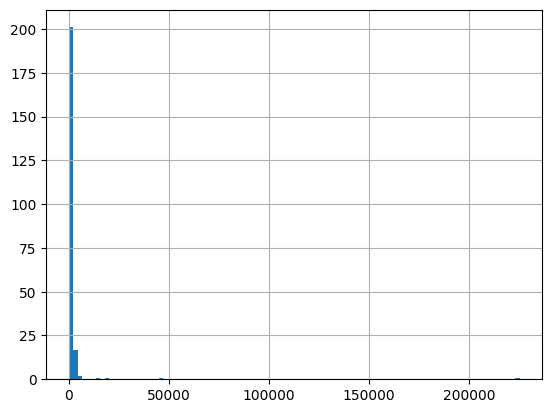

In [11]:
#you can easily see the distribuiton of data in a column with panda's built in .hist() method. Here is the distribution for likes. There is clearly one sample that has way more like sthan the others, this is something we could look into more

df_agg.Likes.hist(bins = 100)

(array([21., 26., 28., 29., 45., 38., 19., 10.,  3.,  5.]),
 array([ 5.23 , 12.367, 19.504, 26.641, 33.778, 40.915, 48.052, 55.189,
        62.326, 69.463, 76.6  ]),
 <BarContainer object of 10 artists>)

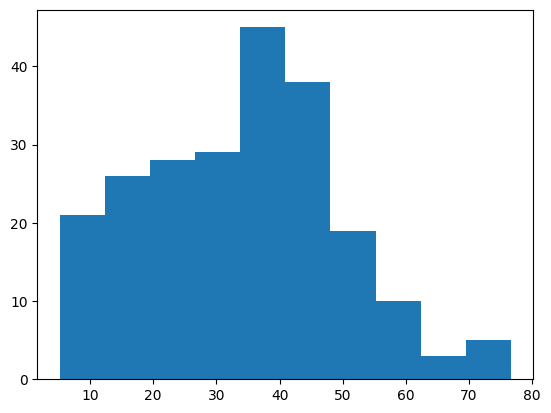

In [15]:
#let's look at the same thing for average percentage viewed. This will have no outliers unlike the likes column. We are using matplotlib's hist function here instead of the integration through pandas. 
plt.hist(df_agg['Average percentage viewed (%)'])

<Axes: >

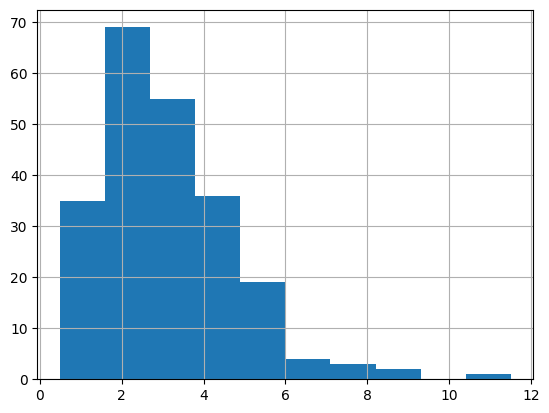

In [16]:
#this data has a significant amount of right skew, we may want to transform this data if we were planning to use linear regression.
df_agg['Impressions click-through rate (%)'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x339e3e7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x339e3ed00>,
 'boxes': [<matplotlib.lines.Line2D at 0x339e3e520>],
 'medians': [<matplotlib.lines.Line2D at 0x339e51280>],
 'fliers': [<matplotlib.lines.Line2D at 0x339e51520>],
 'means': []}

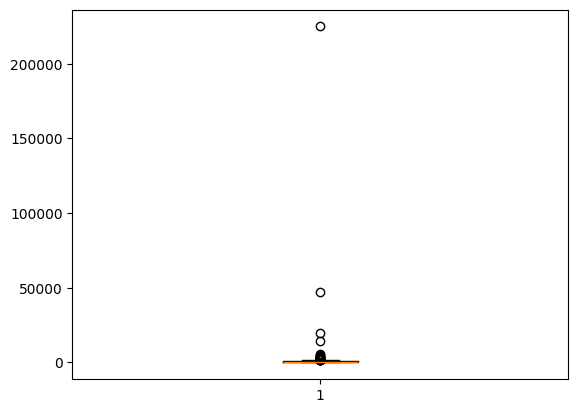

In [17]:
#From this boxplot, we can see that there are quite a few outliers from our normal data. What does this tell us about the nature of likes on videos? Perhaps we shouldn't be trusting averages if something can skew so high. 
plt.boxplot(df_agg['Likes'])

{'whiskers': [<matplotlib.lines.Line2D at 0x339e80d00>,
 'caps': [<matplotlib.lines.Line2D at 0x339eba070>,
 'boxes': [<matplotlib.lines.Line2D at 0x339ea7df0>],
 'medians': [<matplotlib.lines.Line2D at 0x339eba5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x339eba850>],
 'means': []}

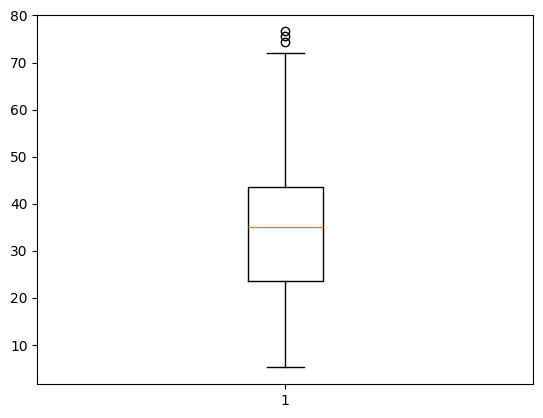

In [18]:
#this plot looks a lot more normal. We can se emost of the videos are viewed between 25-45% of the way through. We still have some outliers, what may be special or different about those? 
plt.boxplot(df_agg['Average percentage viewed (%)'])
#

{'whiskers': [<matplotlib.lines.Line2D at 0x339f282b0>,
 'caps': [<matplotlib.lines.Line2D at 0x339f287f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x339f16fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x339f28d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x339f28fd0>],
 'means': []}

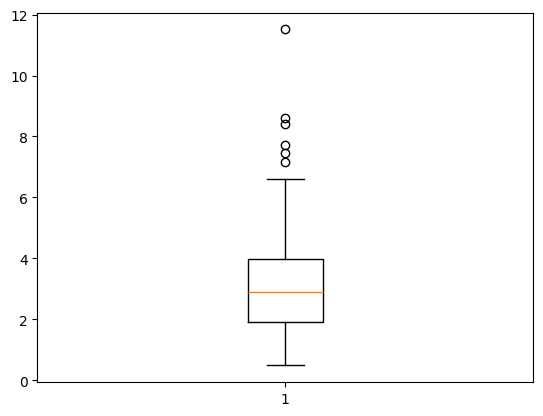

In [19]:
#with click through rate, we also see quite a few high outliers versus the median of / interquartile range.
plt.boxplot(df_agg['Impressions click-through rate (%)'])

<Axes: xlabel='rev_buckets'>

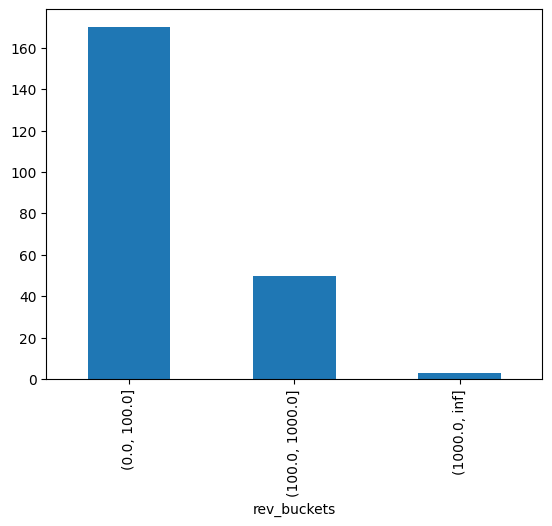

In [20]:
#To show how to do this with categorical data, let's make a categorical column.
#We can take our revenue data and make it into different categories that are relevant to me. Usually I'm interested if videos have made less than $100, 
#between $100-1000 and over $1000. 

#Let's quickly "engineer these categories for ourself"

#make bins from 0-100, 100-1000, and greater than 1000
bins = pd.IntervalIndex.from_tuples([(0, 100), (100, 1000), (1000,float("inf"))])
df_agg['rev_buckets'] = pd.cut(df_agg['Your estimated revenue (USD)'],bins)

#get count of number of videos by reveune bucket
rev_values = df_agg['rev_buckets'].value_counts()
rev_values.plot.bar()

#We can get a sense of the balance of categorical variables using a bar chart like this. 

## Relationships and Multi-Variable Plots
A big part of exploratory data analysis is seeing how mutliple variables are related. We can use multiple different types of plots to easily see these relationships. By understanding these relationships we can start to udnerstand which features may be releated or can serve to predict others. In my opinion, this is where buisiness value starts to emerge. 

In this part we will explore:

1) Scatter plots

2) Correlation Matrices 

3) Pivot Tables

4) Bar Charts

5) Line Charts
 

### Scatter Plots

We use these to see if there is a relationship between two datapoints. 

Let's take a look  at a few variables and see if they may be correlated. We will explore if the average percentage viewed of the video is related to the cost per milli on the video (the amount youtube makes for 1000 views)


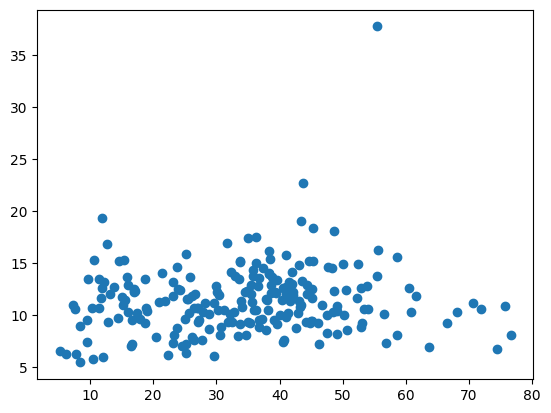

In [21]:
#create plot with matplotlib
plt.scatter(df_agg['Average percentage viewed (%)'] ,df_agg['CPM (USD)'])

<Axes: xlabel='Average percentage viewed (%)', ylabel='CPM (USD)'>

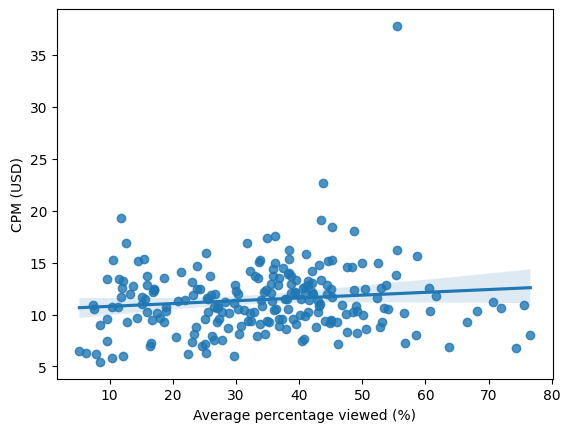

In [22]:
#let's do the same thing with seaborn so we can see a trendline. This will be easier for us to build multiple of these 
sns.regplot(x='Average percentage viewed (%)',y='CPM (USD)', data = df_agg)

#as we can see there is a very little correlation between the two variables 

<Axes: xlabel='RPM (USD)', ylabel='CPM (USD)'>

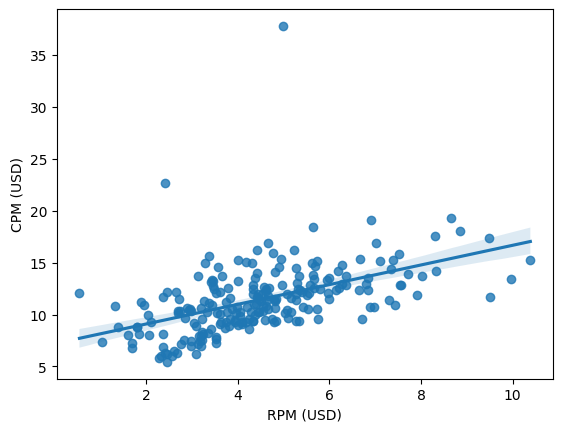

In [23]:
#Let's try another. How do variables RPM and CPM match up. RPM is how much the youtuber makes for an add. Again CPM is how much youtube sells the ad for. 
sns.regplot(x='RPM (USD)',y='CPM (USD)', data = df_agg)

# Here we can see a lot stronger relationship between the two rates. 
# I should probably look into that one value where YouTube is making a massive margin on my video. These are the types of insights you can find in these graphs


### Correlation Matrices 

Scatter plots are great for comparing two variables. Often we have many different variables that we want to see relationships between. 


In this case we would use a correlation matrix. Let's do a correlation matrix for all of our value in the dataset. 


<Axes: >

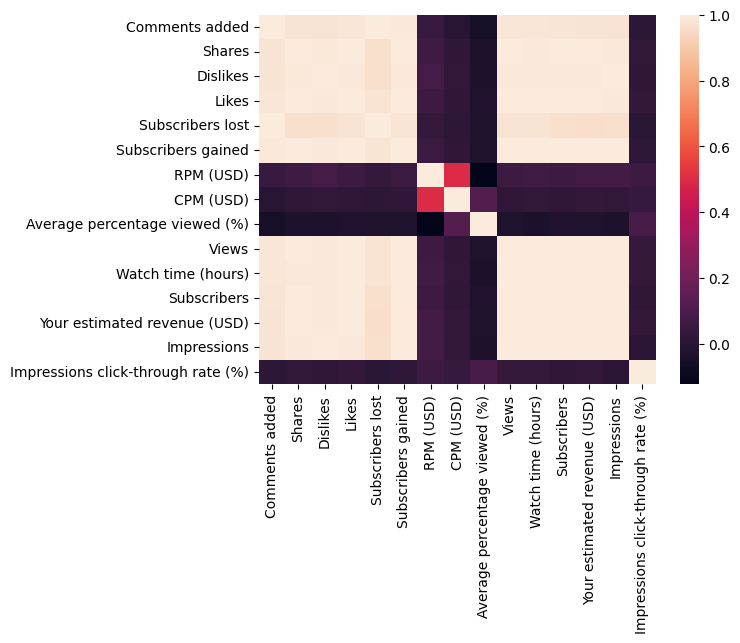

In [25]:
#first, we get the correlations between our datapoints. We can see all the relationships that will be polotted via the pearson correlation coefficient 
corr = df_agg.corr(numeric_only=True)

sns.heatmap(corr)

#this looks pretty awful, let's improve it's look

<Axes: >

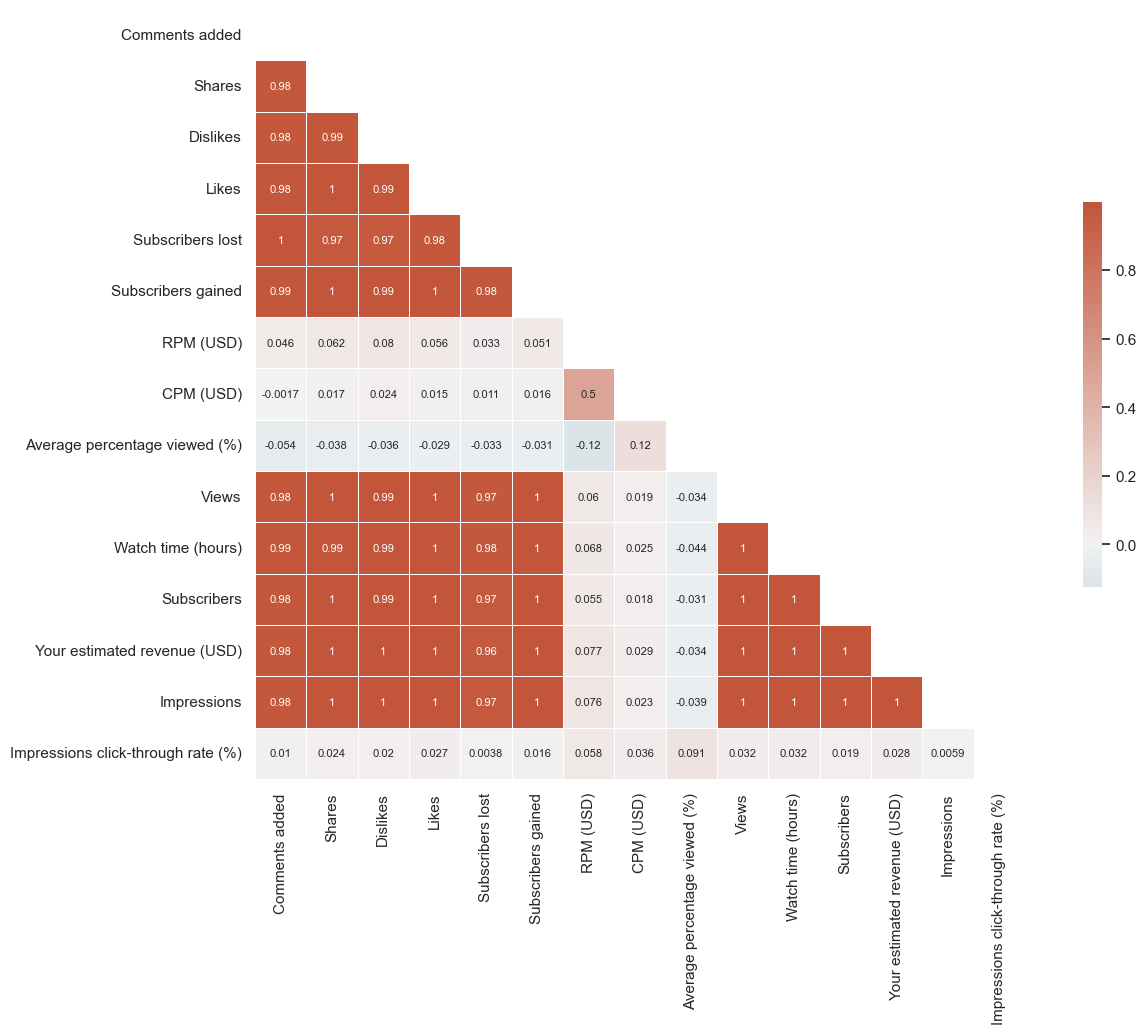

In [27]:
#A better example (formatting used in below chart) - https://seaborn.pydata.org/examples/many_pairwise_correlations.html 

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_agg.corr(numeric_only=True)

# Generate a mask for the upper triangle (otherwise this looks like the square we had above and is redundant)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure 
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap (choose colors here)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio 
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})

#obviously many of thes variables are HIGHLY correlated. Something we may want to explore is why Average percentage viewed is negatively related to RPM

###Pivot Tables
Sometimes we want to cut the data and compare how variables stack up. For example we may want to see which countries have the highest view duration. We can do this easily with pivot tables. 

We will use the df_agg_country_sub dataset to explore this.


In [ ]:
#pivot table to explore values. A basic pivot table takes the average of these different categories we choose.

pd.pivot_table(df_agg_country_sub, index = 'Country Code', values = 'Average View Percentage')

In [ ]:
#this time, let's compare average view percentage by country code and subscriber status.
pd.pivot_table(df_agg_country_sub, index = 'Country Code', columns = 'Is Subscribed',values = 'Average View Percentage')

#we could plot this to see which countries have the biggest difference in subscribed watch time for subscribed vs not subscribed viewers 

In [ ]:
#Let's plot a slightly simpler graph. Let's just look at if subscribers or non-subsribers watch my videos for longer
pd.pivot_table(df_agg_country_sub, index = 'Is Subscribed', values = 'Average View Percentage').plot.bar()

#it appears that subscribers to my channel watch my videos for longer than non-subscribers. This is another way that we can use a bar chart to compare multiple features

### Line Charts
Often, we want to see how variables change over time. Line charts are great for this. Time is an important feature in many models! 

We will use the df_ts dataset for this analys.

In [ ]:
#First we need to make sure our date field is in the date time format. We do this by converting our string to datetime
df_ts['Date'] = pd.to_datetime(df_ts['Date'])

#let's look at user subscriptions removed and see if there is any trend there. We will also compare this with user likes removed to see if we can find anything interesting

#first, we have to aggregate these by video. We do this with a pivot table.
rm_x_date = pd.pivot_table(df_ts, index='Date',values = 'User Subscriptions Removed', aggfunc ='sum').reset_index()

#next we visualize this data with seaborn 
sns.lineplot(data=rm_x_date,x='Date', y='User Subscriptions Removed')

In [ ]:
#now let's compare this with two other related metrics, video likes removed and dislikes

likes_rm_date = pd.pivot_table(df_ts, index='Date',values='Video Likes Removed', aggfunc = 'sum').reset_index()
dislikes_date = pd.pivot_table(df_ts, index='Date',values='Video Dislikes Added', aggfunc = 'sum').reset_index()

sns.lineplot(data=rm_x_date,x='Date', y='User Subscriptions Removed')
sns.lineplot(data=likes_rm_date,x='Date', y='Video Likes Removed')
sns.lineplot(data=dislikes_date,x='Date', y='Video Dislikes Added')


In [ ]:
#This was a bit messy, let's compare it over months instead of days.
df_ts['Month_Year'] = df_ts['Date'].dt.to_period('M')

#create new pivot tables 
rm_x_date = pd.pivot_table(df_ts, index='Month_Year',values = 'User Subscriptions Removed', aggfunc ='sum').reset_index()
likes_rm_date = pd.pivot_table(df_ts, index='Month_Year',values='Video Likes Removed', aggfunc = 'sum').reset_index()
dislikes_date = pd.pivot_table(df_ts, index='Month_Year',values='Video Dislikes Added', aggfunc = 'sum').reset_index()

#create 3 separate line plots with pandas built in visualization tool 
rm_x_date.plot(x='Month_Year',y='User Subscriptions Removed')
likes_rm_date.plot(x='Month_Year',y='Video Likes Removed')
dislikes_date.plot(x='Month_Year',y='Video Dislikes Added')


In [ ]:
#This was a bit messy, let's compare it over months instead of days. To get everything on one graph, we need to make it so every video has the same day.
#Just different months and years 
df_ts['Month_Year'] = df_ts['Date'].apply(lambda x: x.replace(day=1))

rm_x_date = pd.pivot_table(df_ts, index='Month_Year',values = 'User Subscriptions Removed', aggfunc ='sum').reset_index()
likes_rm_date = pd.pivot_table(df_ts, index='Month_Year',values='Video Likes Removed', aggfunc = 'sum').reset_index()
dislikes_date = pd.pivot_table(df_ts, index='Month_Year',values='Video Dislikes Added', aggfunc = 'sum').reset_index()

#create 3 line plots with seaborn all on one graph 
sns.lineplot(data=rm_x_date,x='Month_Year', y='User Subscriptions Removed', label ='Subs Removed')
sns.lineplot(data=likes_rm_date,x='Month_Year', y='Video Likes Removed', label = 'Likes Removed')
sns.lineplot(data=dislikes_date,x='Month_Year', y='Video Dislikes Added', label = 'Dislikes')

#it seems like there is a big spike in unsubscribes and negative comments during this period. We should explore this more.
#maybe we should divide these all by views to determine if the spike is only related to a spike in viewership as well.
#or maybe a single video caused a lot of negative things this period 

In [ ]:
#Let's normalize this by views 

df_ts['Month_Year'] = df_ts['Date'].apply(lambda x: x.replace(day=1))

monthly_views = pd.pivot_table(df_ts, index = 'Month_Year', values = 'Views', aggfunc = 'sum')
rm_x_date = pd.pivot_table(df_ts, index='Month_Year',values = 'User Subscriptions Removed', aggfunc ='sum') / monthly_views.values
likes_rm_date = pd.pivot_table(df_ts, index='Month_Year',values='Video Likes Removed', aggfunc = 'sum') / monthly_views.values
dislikes_date = pd.pivot_table(df_ts, index='Month_Year',values='Video Dislikes Added', aggfunc = 'sum') / monthly_views.values

#create 3 line plots with seaborn all on one graph 
sns.lineplot(data=rm_x_date,x='Month_Year', y='User Subscriptions Removed', label ='Subs Removed')
sns.lineplot(data=likes_rm_date,x='Month_Year', y='Video Likes Removed', label = 'Likes Removed')
sns.lineplot(data=dislikes_date,x='Month_Year', y='Video Dislikes Added', label = 'Dislikes')

#we can see that there was still a spike in the normalized metrics during the same point in the year. It is worth exploring this further! 

## Summary
In this segment you learned the following:
- How to analyze individual features using histograms, boxplots, and bar charts
- How to see relationships between features using scatterplots, correlation heatmaps, bar charts, and line plots 
- How to use these charts to seek additional insight from your data and explore what relationships to dive deeper into 

## Comment Data

## Your Turn! 
### I started you off with the basics of Exploratory Data Analsys (EDA), it's your turn to add your insights to the analysis. Excited to see what you come up with!!
I'm constantly thinking about questions like:
- What topics get the most viewership?
- What do are people asking for in the comments?
- What impacts watch time and click through rate?
- Can we predict if a title will be clickable? 
- What thumbnails are most appealing (thumbnail data available in df_agg)
- What is different about my "viral" videos and normal videos
- Who is the core audience of my channel?
